# Support Vector Machines

Week 7のサポートベクターマシンの課題について

In [1]:
import math, random
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_style('whitegrid')

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

default_figsize = plt.rcParams['figure.figsize']

## Support Vector Machines

### Example Dataset 1

In [2]:
dataset1 = scipy.io.loadmat('ex6data1.mat')
X1 = dataset1['X']
y1 = dataset1['y']

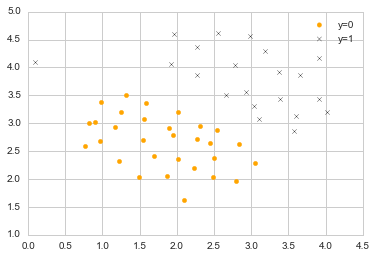

In [3]:
def plot_data1():
    # データをクラスごとに分ける
    xs0 = X1[np.where(y1 == 0)[0]]
    xs1 = X1[np.where(y1 == 1)[0]]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0, 4.5)
    ax.set_ylim(1, 5)
    ax.scatter(xs0[:,0], xs0[:,1], color='orange', marker='o', label='y=0')
    ax.scatter(xs1[:,0], xs1[:,1], color='black',  marker='x', label='y=1')
    ax.legend()
    return ax

plot_data1()

In [4]:
def compute_boundary(svm, xs1, xs2, gridsize):
    ys = np.zeros((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            ys[i, j] = svm.predict(np.array([xs1[i,j], xs2[i,j]]).reshape(1, -1))
#            ys[i, j] = svm.decision_function(np.array([xs1[i,j], xs2[i,j]]).reshape(1, -1))
    return ys

def plot_boundary(ax, xs1, xs2, ys):
    plt.jet()
    ax.contour(xs1, xs2, ys, levels=[0], linewidths=1)
#    ax.contourf(xs1, xs2, ys, cmap=plt.cm.bone, alpha=0.2)
    ax.legend()

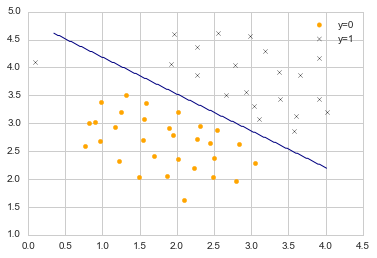

In [5]:
gridsize = 200
xs1, xs2 = np.meshgrid(np.linspace(np.min(X1[:,0]), np.max(X1[:,0]), gridsize),
                       np.linspace(np.min(X1[:,1]), np.max(X1[:,1]), gridsize))

from sklearn import svm
svm = svm.SVC(kernel='linear', C=1, tol=1e-3).fit(X1, y1.ravel())
ys = compute_boundary(svm, xs1, xs2, gridsize)

ax = plot_data1()
plot_boundary(ax, xs1, xs2, ys)

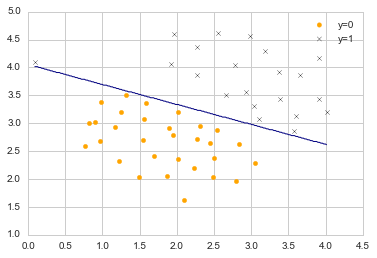

In [6]:
from sklearn import svm
svm = svm.SVC(kernel='linear', C=100, tol=1e-3).fit(X1, y1.ravel())
ys = compute_boundary(svm, xs1, xs2, gridsize)

ax = plot_data1()
plot_boundary(ax, xs1, xs2, ys)

## SVM with Gaussian Kernels

### Example Dataset 2

In [7]:
dataset2 = scipy.io.loadmat('ex6data2.mat')
X2 = dataset2['X']
y2 = dataset2['y']

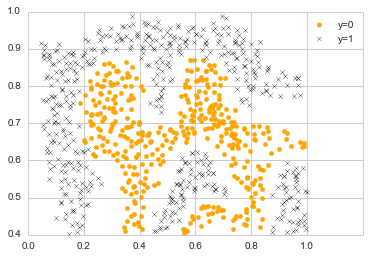

In [8]:
def plot_data2():
    # データをクラスごとに分ける
    xs0 = X2[np.where(y2 == 0)[0]]
    xs1 = X2[np.where(y2 == 1)[0]]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0, 1.2)
    ax.set_ylim(0.4, 1)
    ax.scatter(xs0[:,0], xs0[:,1], color='orange', marker='o', label='y=0')
    ax.scatter(xs1[:,0], xs1[:,1], color='black',  marker='x', label='y=1')
    ax.legend()
    return ax

plot_data2()

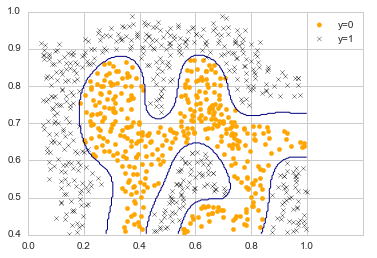

In [9]:
gridsize = 200
xs1, xs2 = np.meshgrid(np.linspace(np.min(X2[:,0]), np.max(X2[:,0]), gridsize),
                       np.linspace(np.min(X2[:,1]), np.max(X2[:,1]), gridsize))

from sklearn import svm
svm = svm.SVC(kernel='rbf', C=1.0, gamma=100).fit(X2, y2.ravel())
ys = compute_boundary(svm, xs1, xs2, gridsize)

ax = plot_data2()
plot_boundary(ax, xs1, xs2, ys)

### Example Dataset 3

In [10]:
dataset3 = scipy.io.loadmat('ex6data3.mat')
Xtrain3 = dataset3['X']
ytrain3 = dataset3['y']
Xcv3 = dataset3['Xval']
ycv3 = dataset3['yval']

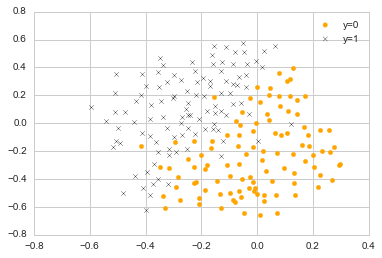

In [11]:
def plot_data3():
    # データをクラスごとに分ける
    xs0 = Xtrain3[np.where(ytrain3 == 0)[0]]
    xs1 = Xtrain3[np.where(ytrain3 == 1)[0]]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(xs0[:,0], xs0[:,1], color='orange', marker='o', label='y=0')
    ax.scatter(xs1[:,0], xs1[:,1], color='black',  marker='x', label='y=1')
    ax.legend()
    return ax

plot_data3()

accuracy = 0.435 c =  0.01 gamma =  0.01
accuracy = 0.5 c =  1.0 gamma =  0.01
accuracy = 0.82 c =  3.0 gamma =  0.01
accuracy = 0.865 c =  10.0 gamma =  0.01
accuracy = 0.915 c =  30.0 gamma =  0.01
accuracy = 0.93 c =  100.0 gamma =  0.01
accuracy = 0.935 c =  300.0 gamma =  0.01
accuracy = 0.94 c =  1.0 gamma =  1.0
accuracy = 0.95 c =  1000.0 gamma =  1.0
accuracy = 0.96 c =  3.0 gamma =  3.0
accuracy = 0.965 c =  30.0 gamma =  10.0


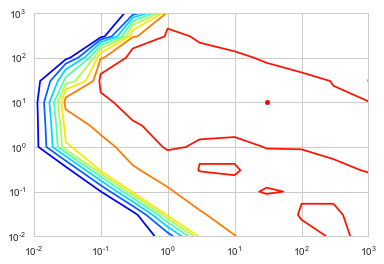

In [29]:
from sklearn.svm import SVC

results = []

cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

xs1, xs2= np.meshgrid(np.array(cs), np.array(gammas))
ys = np.zeros(xs1.shape)
accuracy_best = 0
c_best = 0
gamma_best = 0
model_best = None

for i in range(xs1.shape[0]):
    for j in range(xs1.shape[1]):
        c = xs1[i,j]
        gamma = xs2[i,j]
        model = SVC(kernel='rbf', C=c, gamma=gamma).fit(Xtrain3, ytrain3.ravel())
        pred = model.predict(Xcv3)
        accuracy = np.mean(pred == ycv3.ravel())
        ys[i,j] = accuracy

        if (accuracy > accuracy_best):
            print('accuracy =', accuracy, 'c = ', c, 'gamma = ', gamma)
            accuracy_best = accuracy
            c_best = c
            gamma_best = gamma
            model_best = model


plt.jet()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.contour(xs1, xs2, ys, np.linspace(0.4, 1, 10), linewidth=1)
#ax.contourf(xs1, xs2, ys, alpha=0.2)
ax.plot(c_best, gamma_best, 'k.', color='red', markersize='10')
#ax.legend()

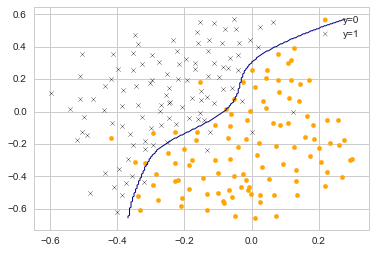

In [13]:
gridsize = 200
xs1, xs2 = np.meshgrid(np.linspace(np.min(Xtrain3[:,0]), np.max(Xtrain3[:,0]), gridsize),
                       np.linspace(np.min(Xtrain3[:,1]), np.max(Xtrain3[:,1]), gridsize))

ys = compute_boundary(model_best, xs1, xs2, gridsize)

ax = plot_data3()
plot_boundary(ax, xs1, xs2, ys)

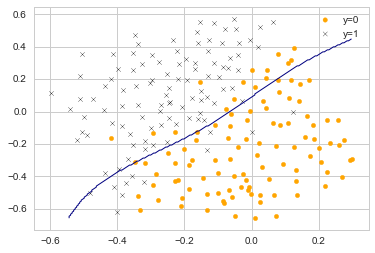

In [27]:
gridsize = 200
xs1, xs2 = np.meshgrid(np.linspace(np.min(Xtrain3[:,0]), np.max(Xtrain3[:,0]), gridsize),
                       np.linspace(np.min(Xtrain3[:,1]), np.max(Xtrain3[:,1]), gridsize))

model = model = SVC(kernel='rbf', C=0.03, gamma=10).fit(Xtrain3, ytrain3.ravel())
ys = compute_boundary(model, xs1, xs2, gridsize)

ax = plot_data3()
plot_boundary(ax, xs1, xs2, ys)

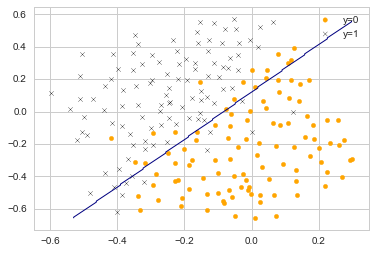

In [28]:
gridsize = 200
xs1, xs2 = np.meshgrid(np.linspace(np.min(Xtrain3[:,0]), np.max(Xtrain3[:,0]), gridsize),
                       np.linspace(np.min(Xtrain3[:,1]), np.max(Xtrain3[:,1]), gridsize))

model = model = SVC(kernel='rbf', C=30, gamma=0.01).fit(Xtrain3, ytrain3.ravel())
ys = compute_boundary(model, xs1, xs2, gridsize)

ax = plot_data3()
plot_boundary(ax, xs1, xs2, ys)

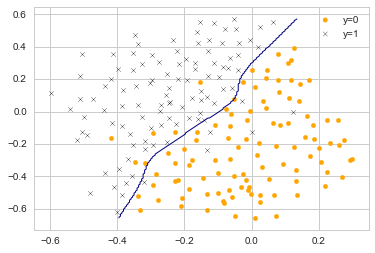

In [30]:
gridsize = 200
xs1, xs2 = np.meshgrid(np.linspace(np.min(Xtrain3[:,0]), np.max(Xtrain3[:,0]), gridsize),
                       np.linspace(np.min(Xtrain3[:,1]), np.max(Xtrain3[:,1]), gridsize))

model = model = SVC(kernel='rbf', C=1000, gamma=10).fit(Xtrain3, ytrain3.ravel())
ys = compute_boundary(model, xs1, xs2, gridsize)

ax = plot_data3()
plot_boundary(ax, xs1, xs2, ys)